In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv('../input/breast-cancer-classification/train.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Id
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN,1
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN,2
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN,3
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN,4
4,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,NaN,10


In [3]:
#Count the number of rows and columns in the dataset
df.shape

(397, 34)

In [4]:
#Count the number of empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Drop the column with all missing values
train = df.dropna(axis = 1)

#Drop the columns having no significance
train = train.drop(['id','Id'], axis = 1)

In [6]:
#Get the new count of the number of rows and columns
train.shape

(397, 31)

In [7]:
#Get a count of the number of malignant(1) and benign(0) cells
train['diagnosis'].value_counts()

0    248
1    149
Name: diagnosis, dtype: int64

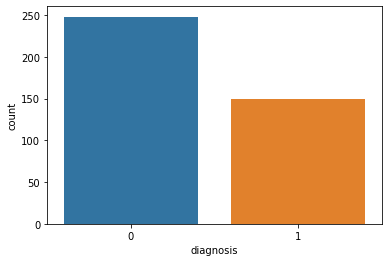

In [8]:
#Visualize the count
sns.countplot(train['diagnosis'], label = 'count')

In [9]:
#look at the data types to see which columns need to be encoded
train.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

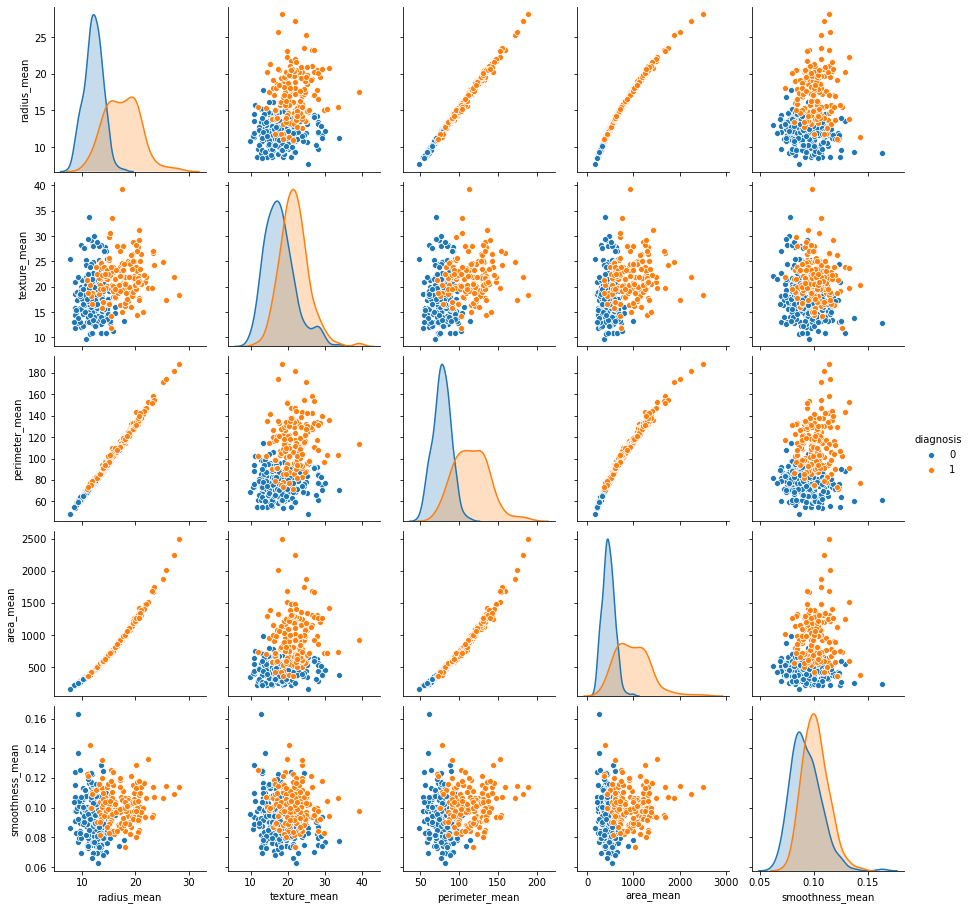

In [10]:
#Create a pair plot
sns.pairplot(train.iloc[: ,0:6], hue = 'diagnosis')

In [11]:
#Print first five rows of new data
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [12]:
#Get the correlation of the columns
train.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.737360,0.421441,0.748387,0.718154,0.310770,0.571752,0.673905,0.762455,0.300717,...,0.781113,0.446550,0.786110,0.745414,0.362068,0.583506,0.645140,0.782432,0.388251,0.317418
radius_mean,0.737360,1.000000,0.328085,0.997755,0.989278,0.141852,0.501641,0.671340,0.822999,0.128008,...,0.972492,0.290311,0.967946,0.950705,0.082485,0.426476,0.531450,0.738755,0.147987,0.023088
texture_mean,0.421441,0.328085,1.000000,0.333860,0.320740,-0.045885,0.240665,0.312536,0.301052,0.055114,...,0.362717,0.915653,0.369587,0.354247,0.037808,0.282635,0.315988,0.307193,0.084107,0.119221
perimeter_mean,0.748387,0.997755,0.333860,1.000000,0.988203,0.178253,0.553570,0.711100,0.851967,0.163242,...,0.972230,0.296390,0.973412,0.950923,0.111729,0.469542,0.568555,0.767075,0.174212,0.067668
area_mean,0.718154,0.989278,0.320740,0.988203,1.000000,0.155869,0.497595,0.682382,0.827299,0.130457,...,0.965131,0.278176,0.961291,0.963118,0.092493,0.405802,0.520220,0.721390,0.129076,0.020668
smoothness_mean,0.310770,0.141852,-0.045885,0.178253,0.155869,1.000000,0.641234,0.493387,0.527991,0.543382,...,0.188677,0.015502,0.214649,0.190632,0.803231,0.481618,0.426603,0.495256,0.410230,0.526938
compactness_mean,0.571752,0.501641,0.240665,0.553570,0.497595,0.641234,1.000000,0.879128,0.828627,0.591400,...,0.533323,0.240140,0.590475,0.515694,0.523782,0.876606,0.814716,0.819186,0.515112,0.702189
concavity_mean,0.673905,0.671340,0.312536,0.711100,0.682382,0.493387,0.879128,1.000000,0.916800,0.479313,...,0.686270,0.304112,0.728891,0.680021,0.409272,0.769321,0.896434,0.869901,0.415795,0.530361
concave points_mean,0.762455,0.822999,0.301052,0.851967,0.827299,0.527991,0.828627,0.916800,1.000000,0.443012,...,0.832859,0.290959,0.860105,0.821583,0.418469,0.689060,0.762286,0.916908,0.373666,0.393829
symmetry_mean,0.300717,0.128008,0.055114,0.163242,0.130457,0.543382,0.591400,0.479313,0.443012,1.000000,...,0.167553,0.064330,0.199551,0.160125,0.386379,0.465694,0.414588,0.415701,0.714958,0.427084


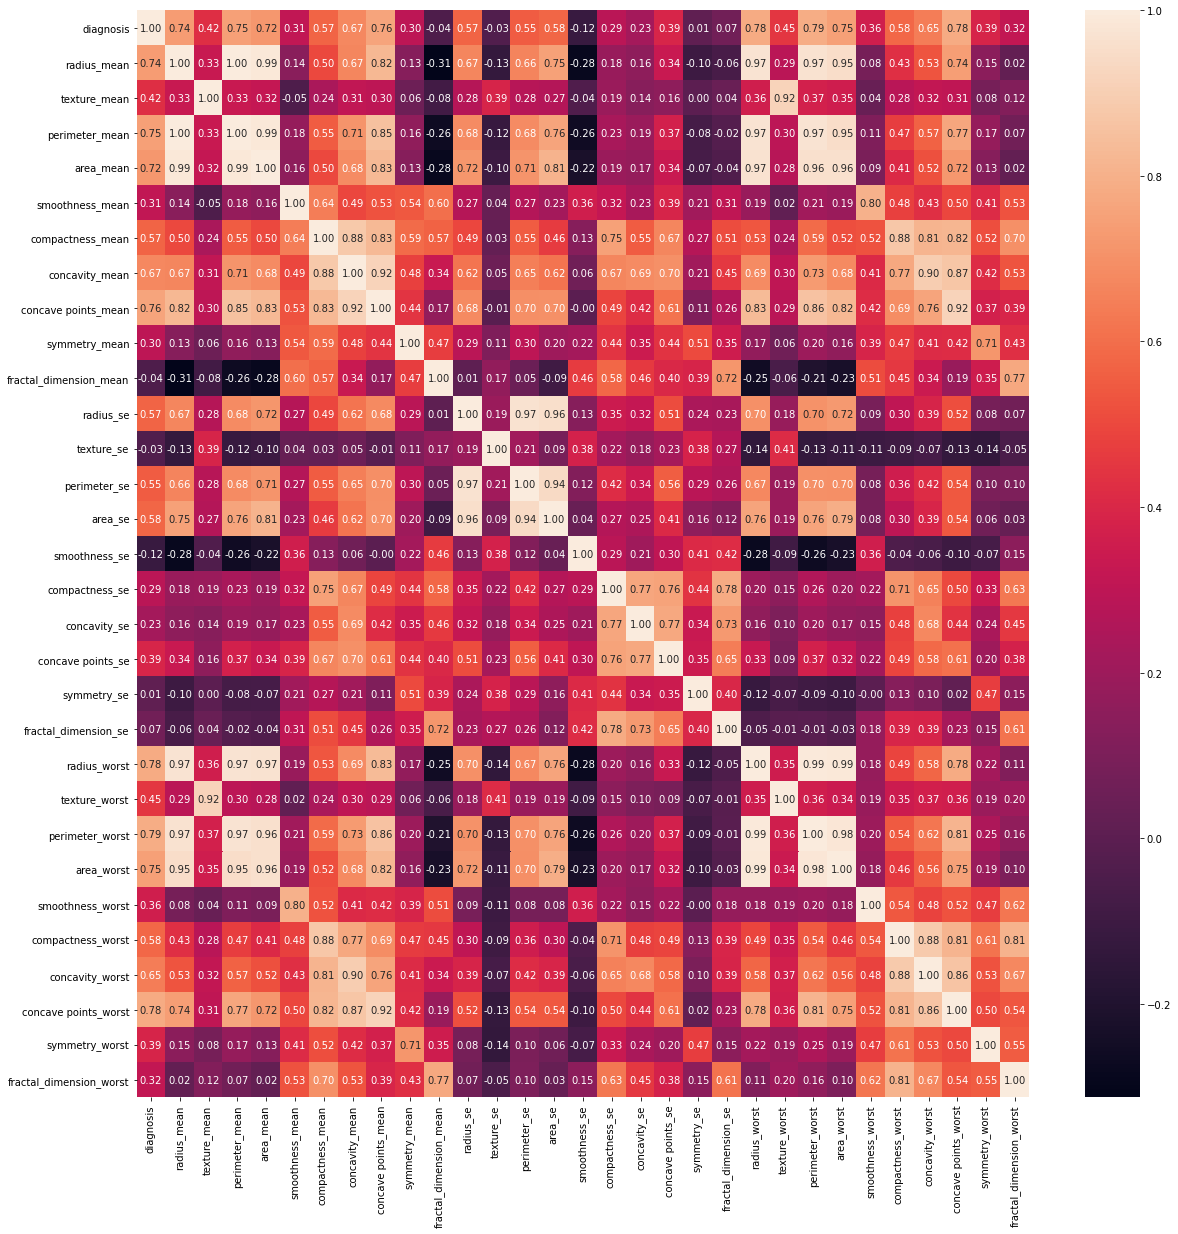

In [13]:
#Visualize the correlation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train.corr(), annot = True, fmt= '.2f')

In [14]:
#Split the dataset into independent(X) and dependent(Y) datasets
X = train.iloc[:,1:31].values
Y = train.iloc[:,0].values

In [15]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [16]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
#Create a function for models
def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train, Y_train)
    
    #Print the model accuracy of training data
    print('[0]Logistic Regression Training Accuracy : ',log.score(X_train, Y_train))
    print('[1]Decision Tree Training Accuracy : ',tree.score(X_train, Y_train))
    print('[2]Random Forest Training Accuracy : ',forest.score(X_train, Y_train))
    
    return log, tree, forest

In [18]:
#Getting all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy :  0.9891696750902527
[1]Decision Tree Training Accuracy :  1.0
[2]Random Forest Training Accuracy :  1.0


In [19]:
#test model accuracy on test data using confusion matrix
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    print('Model :',model[i])
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    print(cm)
    print('Testing Accuracy =',(TP + TN)/(TP + FP + FN + TN))
    print()

Model : LogisticRegression()
[[70  0]
 [ 7 43]]
Testing Accuracy = 0.9416666666666667

Model : DecisionTreeClassifier()
[[65  5]
 [ 8 42]]
Testing Accuracy = 0.8916666666666667

Model : RandomForestClassifier()
[[67  3]
 [ 7 43]]
Testing Accuracy = 0.9166666666666666



In [20]:
#Another way to get matrix of the models
from sklearn.metrics import classification_report, accuracy_score
for i in range (len(model)):
    print('Model :',model[i])
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test,model[i].predict(X_test)))
    print()

Model : LogisticRegression()
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       1.00      0.86      0.92        50

    accuracy                           0.94       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.95      0.94      0.94       120

0.9416666666666667

Model : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.89      0.84      0.87        50

    accuracy                           0.89       120
   macro avg       0.89      0.88      0.89       120
weighted avg       0.89      0.89      0.89       120

0.8916666666666667

Model : RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        70
           1       0.93      0.86      0.90        50

    accuracy                           0.92    

In [21]:
#test our trained model on the test data
test_df = pd.read_csv('../input/breast-cancer-classification/test.csv')
test = test_df.drop(['Unnamed: 32','Id','id'],axis = 1)

test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
2,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
3,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
4,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [22]:
test = sc.fit_transform(test)

In [23]:
y_pred = pd.DataFrame(model[0].predict(test), columns=['diagnosis'])

In [24]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'diagnosis': y_pred['diagnosis']})
submission_df

,Id,diagnosis
0,0,1
1,5,1
2,6,1
3,7,1
4,8,1
...,...,...
167,548,0
168,552,0
169,557,0
170,564,1


In [25]:
submission_df.to_csv("bcc.csv", index=False)